In [ ]:
!pip install sklearn
!pip install mlxtend

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [6]:
dataset = pd.read_csv("dataset.csv")
dataset = dataset.sample(frac = 1).reset_index(drop = True)

In [4]:
dataset.head(5)

,Day,Month,Airline,Origin,Destination,Scheduled Departure,Departure Time,Departure Delay,Scheduled Arrival,Arrival Time,Actual Time,Distance,Status
0,5,2,Virgin America,San Diego International Airport (Lindbergh Field),San Francisco International Airport,820,859.0,39.0,957,1025.0,86.0,447.0,1
1,30,3,Virgin America,San Francisco International Airport,Los Angeles International Airport,750,857.0,67.0,930,1034.0,97.0,337.0,1
2,16,2,Virgin America,Philadelphia International Airport,Los Angeles International Airport,630,647.0,17.0,943,1026.0,399.0,2402.0,1
3,3,3,Virgin America,Palm Springs International Airport,John F. Kennedy International Airport (New Yor...,1437,1436.0,-1.0,2233,2244.0,308.0,2378.0,1
4,17,3,Virgin America,Seattle-Tacoma International Airport,San Francisco International Airport,615,613.0,-2.0,821,815.0,122.0,679.0,0


### Preparing dataset for modeling
        Before solving the problem by using machine learning algorithms, I will prepare the data set and perform final cleanings:
        1. Remove Airline (the airline are Virgin America).
        2. Remove Arrival Delay (there is a Status column that represent which flight has delyad or not).
        3. Using OneHot encoding for the categorial features : Origin and Destination

In [7]:
dataset.drop(["Arrival Delay","Airline"] , inplace = True ,axis = 1)
dataset = pd.get_dummies(dataset , columns = ['Origin','Destination'])

The use of the various algorithms will be done by the **Sklearn library**, which provides a convenient library for various models in machine learning,
tools for analyzing the model performance and more.

In [8]:
y = np.array(dataset.Status)
dataset.drop("Status" , axis = 1 , inplace = True)
X = np.array(dataset)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
y_train = y_train.ravel() #change the shape of y_train to (number of sampels , )

In [13]:
def evaluate (model ,x_train , y_train , x_test , y_test ):
    
    train_size = x_train.shape[0]
    epochs = 10
    batch_size = 1024
    classes = np.unique(y_train)
    scores_train = []
    scores_test = []

    epoch = 1
    while epoch <= epochs:
        print(f' Epoch number : {epoch}')
        random_perm = np.random.permutation(train_size)
        mini_batch = 0
        while True:
            indices = random_perm [mini_batch : mini_batch + batch_size]
            model.fit(x_train[indices], y_train[indices])
            mini_batch += batch_size

            if mini_batch >= train_size:
                break

        scores_train.append(model.score(x_train, y_train))
        scores_test.append(model.score(x_test, y_test))

        epoch += 1

    return scores_train , scores_test

In [10]:
def plot_learning_curve(scores_train , scores_test):
    print(f' Train Accuracy : {np.max(scores_train)} Validation Accuracy : {np.max(scores_test)}')
    print(f' The best number of epochs for training : {np.argmax(scores_test)}')
    plt.plot(scores_train, color='blue', marker='o', markersize=5, label = 'Training Accuracy')
    plt.plot(scores_test, color='green', marker='+', markersize=5, linestyle='--', label= 'Validation Accuracy')
    plt.title('Learning Curve')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

In [11]:
def plot_confusion_matrix(matrix, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = 'Greens');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

### Logistic Regression

 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Epoch number : 10
 Train Accuracy : 0.8564183477966866 Validation Accuracy : 0.8606363397317907
 The best number of epochs for training : 7


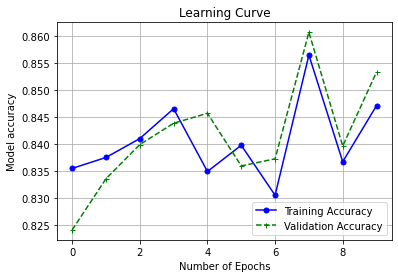

              precision    recall  f1-score   support

 Not Delayed       0.81      0.92      0.86      1883
     Delayed       0.91      0.79      0.84      1920

    accuracy                           0.85      3803
   macro avg       0.86      0.85      0.85      3803
weighted avg       0.86      0.85      0.85      3803



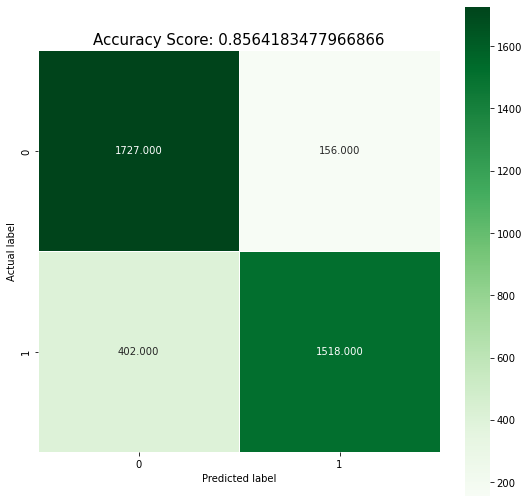

In [14]:
logistic_regression = make_pipeline(StandardScaler() , LogisticRegression(max_iter = 100 , solver = 'lbfgs' , class_weight = "balanced"))
scores_train , scores_test = evaluate(logistic_regression , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, logistic_regression.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, logistic_regression.predict(x_test), target_names= ['Not Delayed','Delayed']))

### Neural Network (MLP)

 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Epoch number : 10
 Train Accuracy : 0.810323453172546 Validation Accuracy : 0.8122534840915067
 The best number of epochs for training : 7


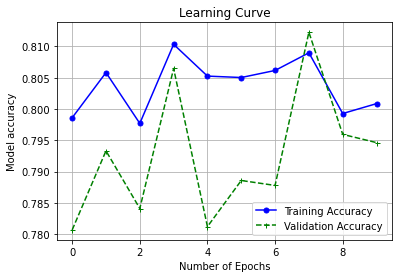

              precision    recall  f1-score   support

 Not Delayed       0.79      0.79      0.79      1883
     Delayed       0.80      0.80      0.80      1920

    accuracy                           0.79      3803
   macro avg       0.79      0.79      0.79      3803
weighted avg       0.79      0.79      0.79      3803



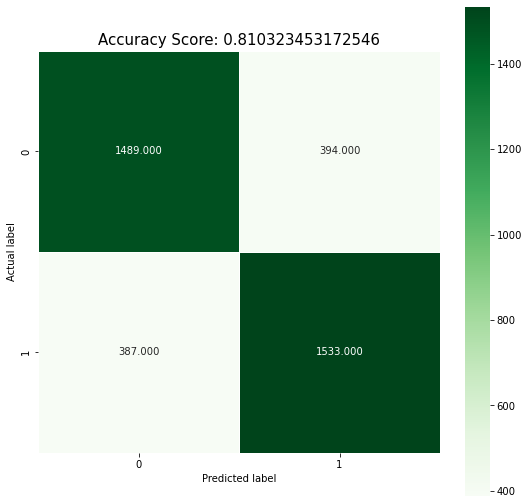

In [15]:
neural_network = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes = (128,64), activation="relu" , random_state = 1))
scores_train , scores_test = evaluate(neural_network , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, neural_network.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, neural_network.predict(x_test), target_names= ['Not Delayed','Delayed']))

### K Nearest Neighbors (KNN)

 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Epoch number : 10
 Train Accuracy : 0.6156880423757467 Validation Accuracy : 0.60110439127005
 The best number of epochs for training : 4


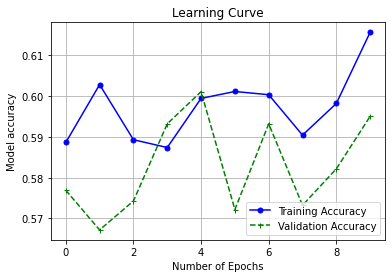

              precision    recall  f1-score   support

 Not Delayed       0.59      0.61      0.60      1883
     Delayed       0.60      0.58      0.59      1920

    accuracy                           0.60      3803
   macro avg       0.60      0.60      0.59      3803
weighted avg       0.60      0.60      0.59      3803



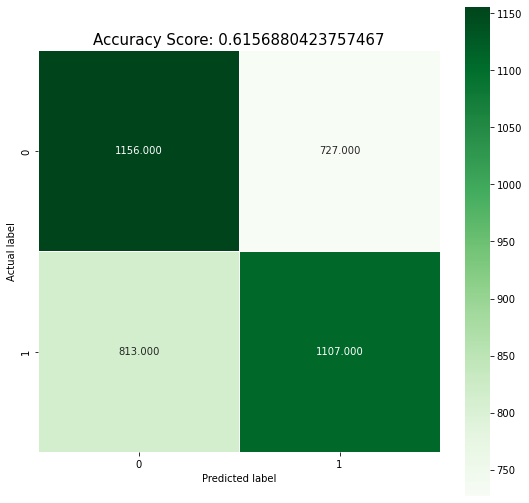

In [16]:
knn = make_pipeline(StandardScaler() , KNeighborsClassifier(n_neighbors = 5))
scores_train , scores_test = evaluate(knn , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, knn.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, knn.predict(x_test), target_names= ['Not Delayed','Delayed']))

### Random Forest

 Epoch number : 1
 Epoch number : 2
 Epoch number : 3
 Epoch number : 4
 Epoch number : 5
 Epoch number : 6
 Epoch number : 7
 Epoch number : 8
 Epoch number : 9
 Epoch number : 10
 Train Accuracy : 0.8179871520342612 Validation Accuracy : 0.8156718380226137
 The best number of epochs for training : 2


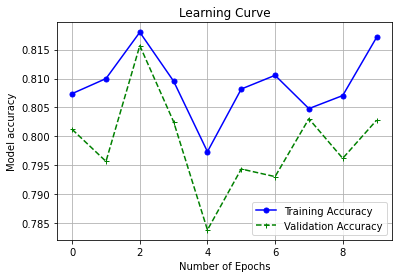

              precision    recall  f1-score   support

 Not Delayed       0.78      0.83      0.81      1883
     Delayed       0.82      0.78      0.80      1920

    accuracy                           0.80      3803
   macro avg       0.80      0.80      0.80      3803
weighted avg       0.80      0.80      0.80      3803



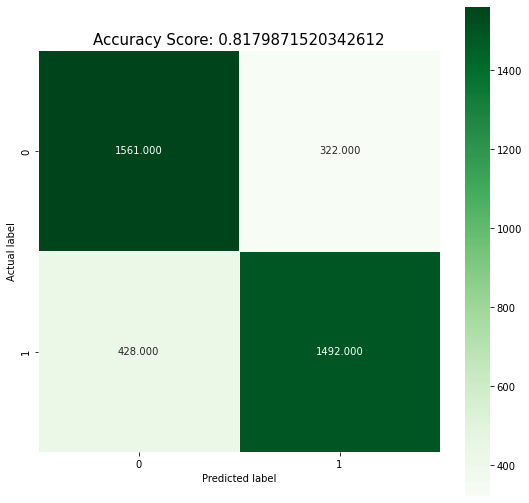

In [17]:
random_forest = make_pipeline(StandardScaler() , RandomForestClassifier(n_estimators = 100 , class_weight = "balanced"))
scores_train , scores_test = evaluate(random_forest , x_train , y_train , x_test , y_test)
plot_learning_curve(scores_train , scores_test)
cm = metrics.confusion_matrix(y_test, random_forest.predict(x_test))
score = np.max(scores_train)
plot_confusion_matrix(cm, score)
print(classification_report(y_test, random_forest.predict(x_test), target_names= ['Not Delayed','Delayed']))

### Predict Flight departure delay in minutes:
    We will now present a new problem, a regression problem whereby we would like to predict the number of
    minutes of flight delays during takeoff. Thus our dependent variable becomes Departure Delay, 
    and since we are dealing with a numerical value prediction problem we will use a linear regression model which looks for the
    different relationships between the independent variables and the dependent variable.

In [44]:
dataset = pd.read_csv("dataset.csv")
dataset.drop(["Airline","Status"] , inplace = True ,axis = 1)
lable = dataset.pop("Departure Delay")
dataset.insert(11,"Status",lable)
dataset.head(3)

,Day,Month,Origin,Destination,Scheduled Departure,Departure Time,Scheduled Arrival,Arrival Time,Arrival Delay,Actual Time,Distance,Status
0,27,2,San Francisco International Airport,McCarran International Airport,1205,1151.0,1336,1325.0,-11.0,94.0,414.0,-14.0
1,18,2,McCarran International Airport,San Francisco International Airport,730,719.0,910,855.0,-15.0,96.0,414.0,-11.0
2,3,1,Gen. Edward Lawrence Logan International Airport,Los Angeles International Airport,900,906.0,1254,1240.0,-14.0,394.0,2611.0,6.0


In [45]:
dataset = pd.get_dummies(dataset , columns = ['Origin','Destination'])
dataset = dataset.sample(frac = 1).reset_index(drop = True)

In [46]:
y = np.array(dataset.Status)
dataset.drop("Status" , axis = 1 , inplace = True)
X = np.array(dataset)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
y_train = y_train.ravel() #change the shape of y_train to (number of sampels , )

In [47]:
linear_regression = make_pipeline(StandardScaler() , LinearRegression())
linear_regression.fit(x_train,y_train)
print(linear_regression.score(x_test,y_test))

0.9742198998739947
